# Data Analysis and Transformation

## 1. General Understanding of Data (Summary Statistics)

### Statistics: Mean, median, standard deviation, minimum, and maximum values.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
import itertools

In [44]:
df = pd.read_csv('train.csv')
target = df['sales']
data = df.drop(columns='sales')
data

,date,family,onpromotion,city,state,store_type,cluster,transactions,event_type,locale,transferred,dcoilwtico
0,2013-01-01,AUTOMOTIVE,0,Quito,Pichincha,D,13,0.0,Holiday,National,False,93.14
1,2013-01-01,BABY CARE,0,Quito,Pichincha,D,13,0.0,Holiday,National,False,93.14
2,2013-01-01,BEAUTY,0,Quito,Pichincha,D,13,0.0,Holiday,National,False,93.14
3,2013-01-01,BEVERAGES,0,Quito,Pichincha,D,13,0.0,Holiday,National,False,93.14
4,2013-01-01,BOOKS,0,Quito,Pichincha,D,13,0.0,Holiday,National,False,93.14
...,...,...,...,...,...,...,...,...,...,...,...,...
3032512,2017-08-15,POULTRY,0,Quito,Pichincha,B,6,2155.0,Holiday,Local,False,47.57
3032513,2017-08-15,PREPARED FOODS,1,Quito,Pichincha,B,6,2155.0,Holiday,Local,False,47.57
3032514,2017-08-15,PRODUCE,148,Quito,Pichincha,B,6,2155.0,Holiday,Local,False,47.57
3032515,2017-08-15,SCHOOL AND OFFICE SUPPLIES,8,Quito,Pichincha,B,6,2155.0,Holiday,Local,False,47.57


In [45]:
target

0             0.000
1             0.000
2             0.000
3             0.000
4             0.000
             ...   
3032512     438.133
3032513     154.553
3032514    2419.729
3032515     121.000
3032516      16.000
Name: sales, Length: 3032517, dtype: float64

In [46]:
data.describe()

,onpromotion,cluster,transactions,dcoilwtico
count,3.032517e+06,3.032517e+06,3.032517e+06,3.032517e+06
mean,2.615922e+00,8.480572e+00,1.559670e+03,6.785671e+01
std,1.225780e+01,4.649886e+00,1.036312e+03,2.566188e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,2.619000e+01
25%,0.000000e+00,4.000000e+00,9.320000e+02,4.632000e+01
50%,0.000000e+00,8.000000e+00,1.333000e+03,5.341000e+01
75%,0.000000e+00,1.300000e+01,1.981000e+03,9.572000e+01
max,7.410000e+02,1.700000e+01,8.359000e+03,1.106200e+02


In [47]:
# Identify numeric columns
numeric_columns = data.select_dtypes(include='number')

# Calculate and print the median for each numeric column
for column in numeric_columns.columns:
    median_value = numeric_columns[column].median()
    print(f"{column} median is {median_value}")


onpromotion median is 0.0
cluster median is 8.0
transactions median is 1333.0
dcoilwtico median is 53.41


###  Plot histograms to understand the shape of the distribution (normal, skewed, uniform).

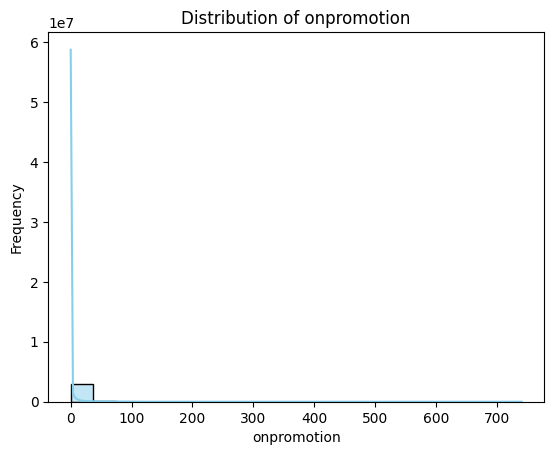

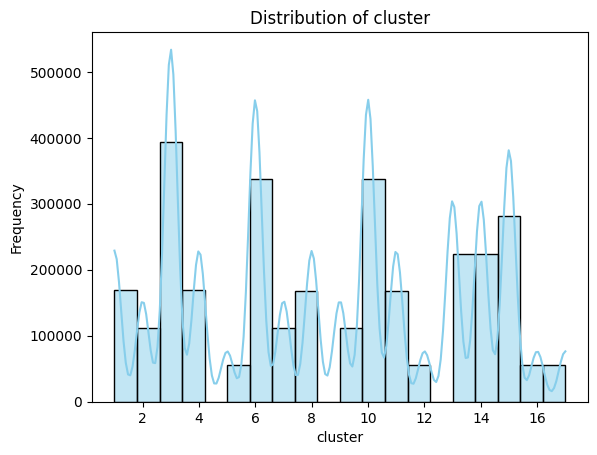

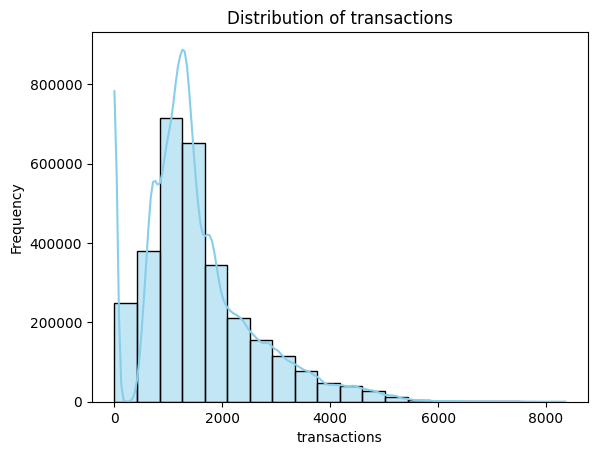

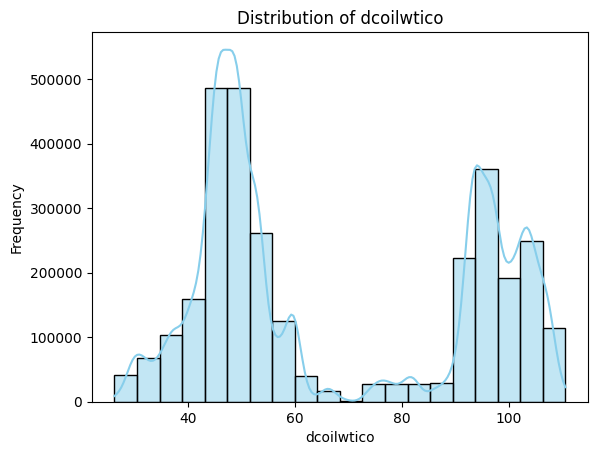

In [8]:
for column in numeric_columns.columns:
    sns.histplot(data[column], color='skyblue', bins=20, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


/tmp/ipykernel_8149/3179749543.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='pastel')


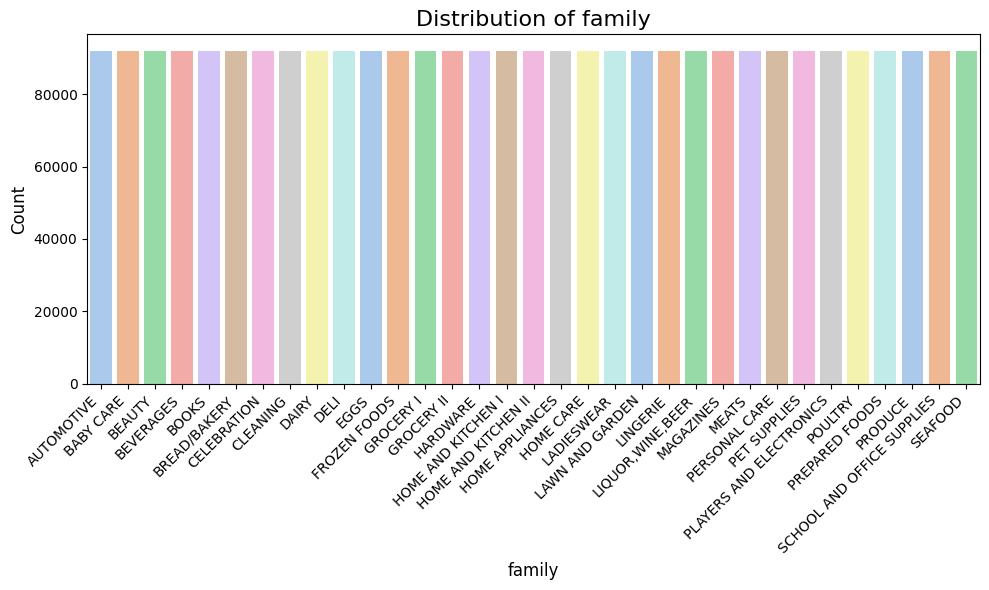

/tmp/ipykernel_8149/3179749543.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='pastel')


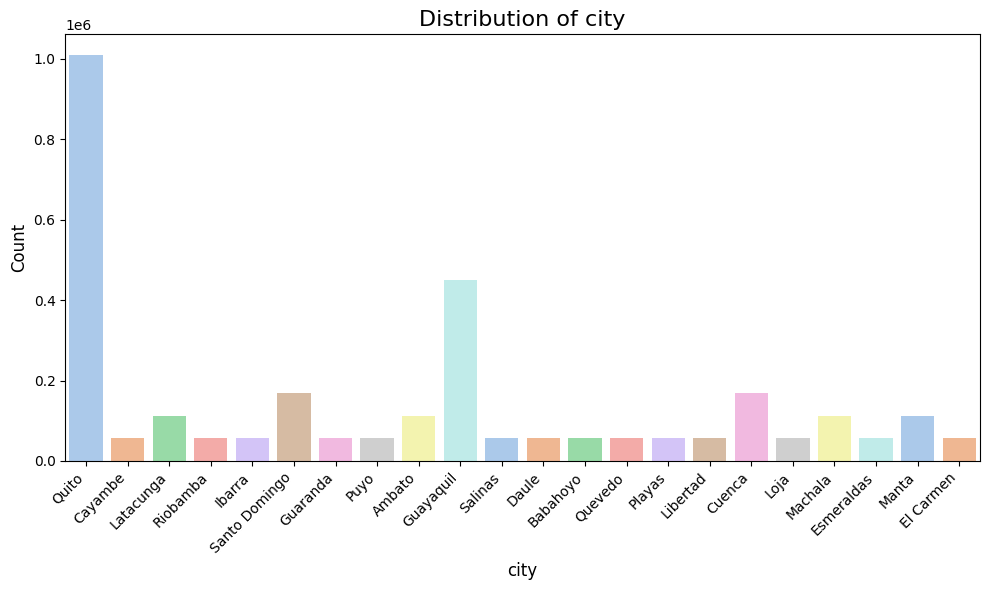

/tmp/ipykernel_8149/3179749543.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='pastel')


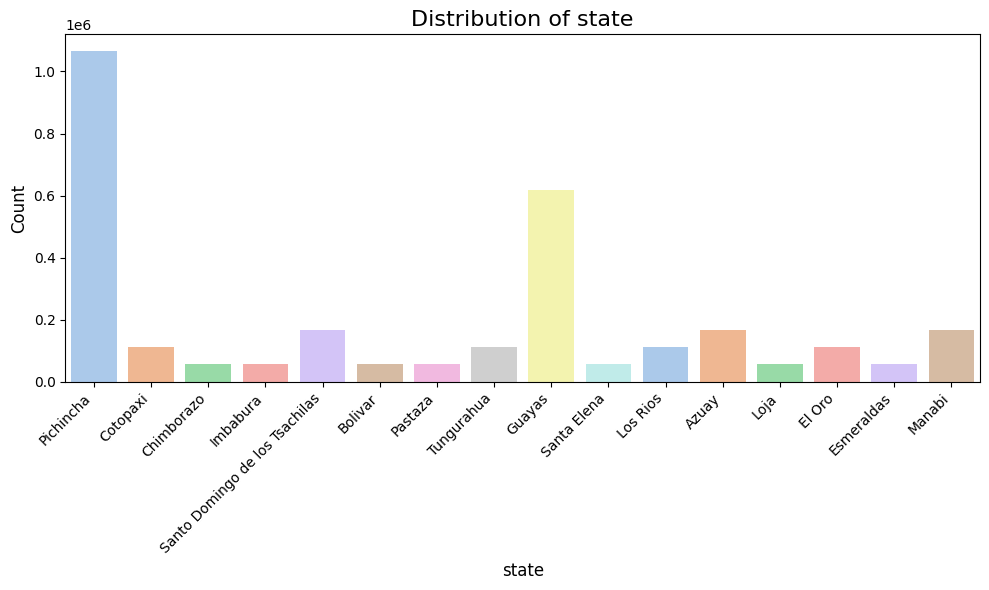

/tmp/ipykernel_8149/3179749543.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='pastel')


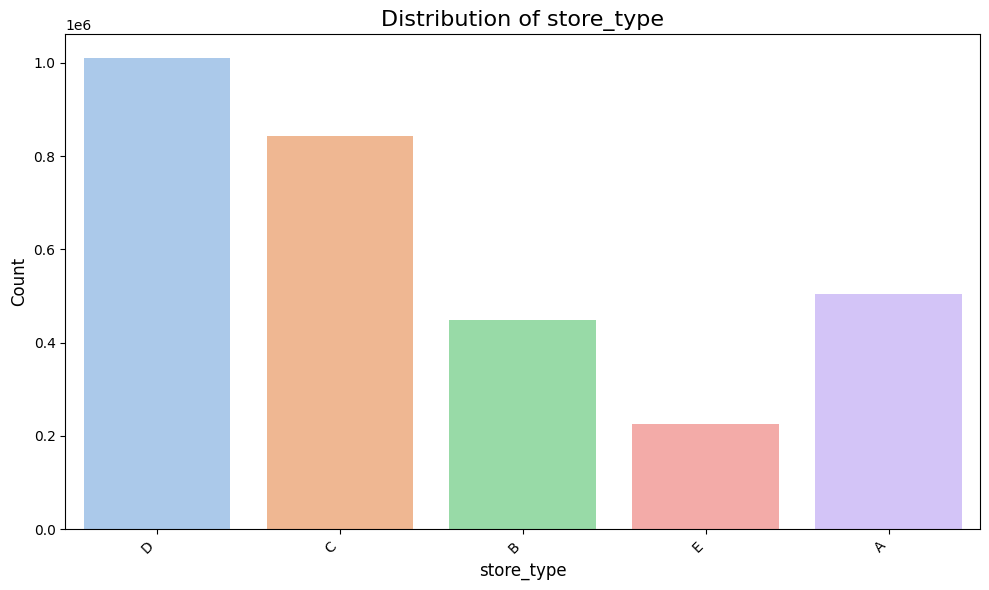

/tmp/ipykernel_8149/3179749543.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='pastel')


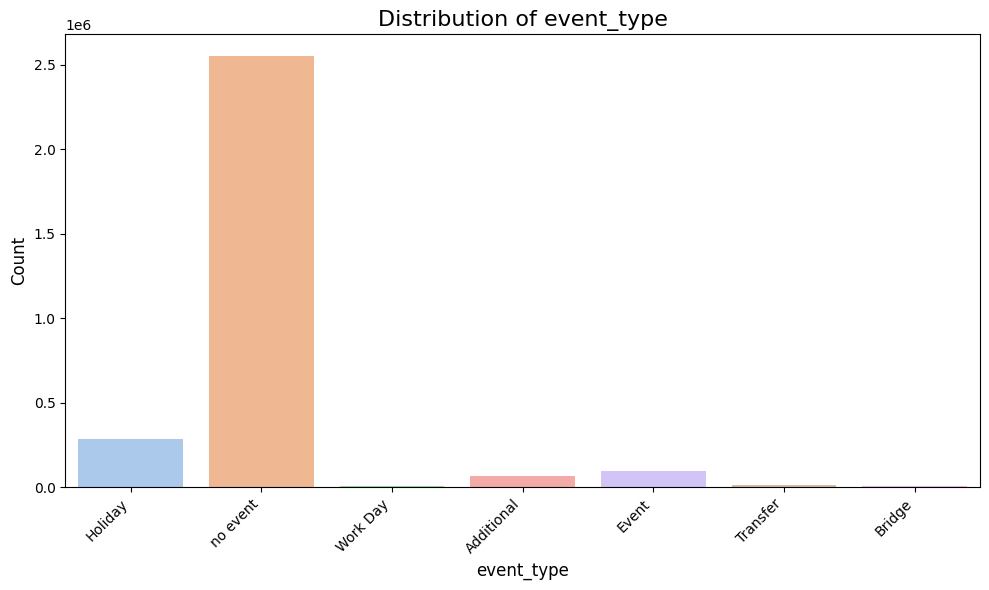

/tmp/ipykernel_8149/3179749543.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='pastel')


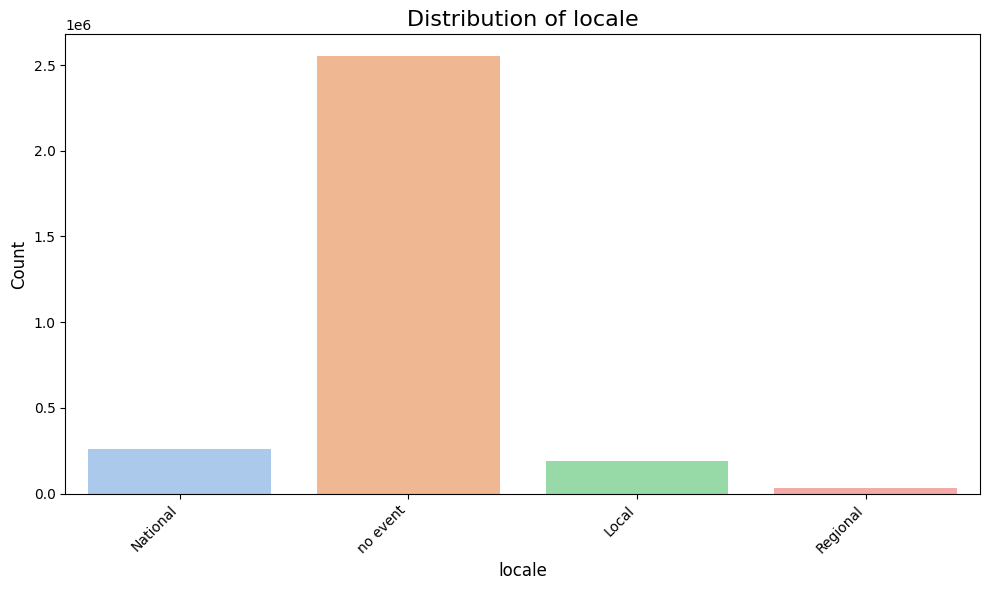

/tmp/ipykernel_8149/3179749543.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='pastel')


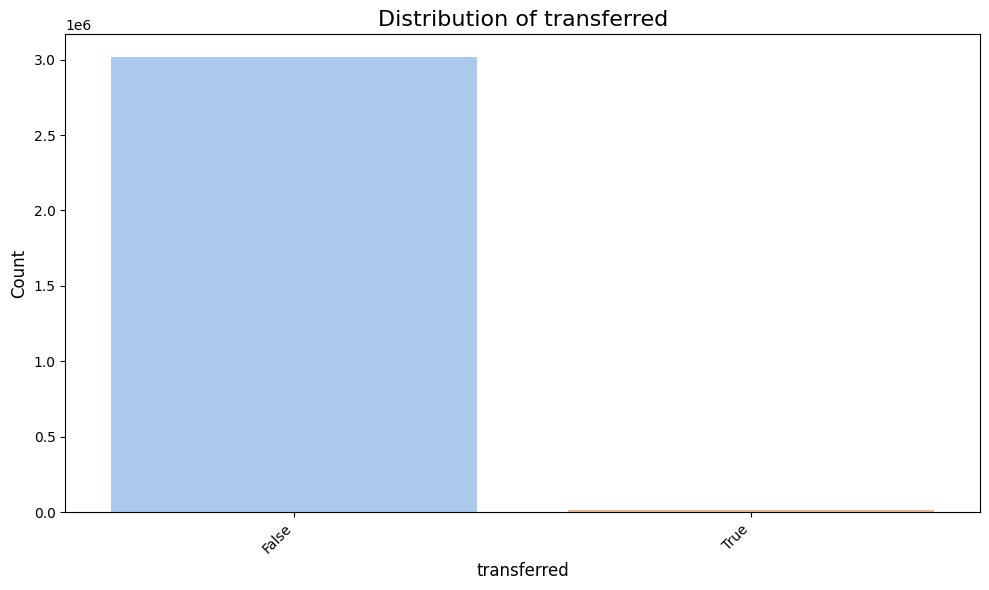

In [9]:
categorical_columns = data.select_dtypes(exclude='number')
categorical_columns.drop(columns=['date'], inplace=True)
# Plot bar plots for categorical columns
for column in categorical_columns.columns:
    plt.figure(figsize=(10, 6))  # Increase figure size for better readability
    sns.countplot(data=data, x=column, palette='pastel')
    plt.title(f"Distribution of {column}", fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotate and align labels to the right
    plt.tight_layout()  # Adjust spacing to prevent overlapping
    plt.show()

### Date Feature Breakdown and Transformation

In [48]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek 
df['salary'] = df['date'].apply(lambda x: x.day == 15 or x.is_month_end)
df.drop(columns='date', inplace=True)
df

,family,sales,onpromotion,city,state,store_type,cluster,transactions,event_type,locale,transferred,dcoilwtico,year,month,day,day_of_week,salary
0,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,0.0,Holiday,National,False,93.14,2013,1,1,1,False
1,BABY CARE,0.000,0,Quito,Pichincha,D,13,0.0,Holiday,National,False,93.14,2013,1,1,1,False
2,BEAUTY,0.000,0,Quito,Pichincha,D,13,0.0,Holiday,National,False,93.14,2013,1,1,1,False
3,BEVERAGES,0.000,0,Quito,Pichincha,D,13,0.0,Holiday,National,False,93.14,2013,1,1,1,False
4,BOOKS,0.000,0,Quito,Pichincha,D,13,0.0,Holiday,National,False,93.14,2013,1,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032512,POULTRY,438.133,0,Quito,Pichincha,B,6,2155.0,Holiday,Local,False,47.57,2017,8,15,1,True
3032513,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,2155.0,Holiday,Local,False,47.57,2017,8,15,1,True
3032514,PRODUCE,2419.729,148,Quito,Pichincha,B,6,2155.0,Holiday,Local,False,47.57,2017,8,15,1,True
3032515,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,2155.0,Holiday,Local,False,47.57,2017,8,15,1,True


The date column is converted to a datetime format to enable date-based operations. New columns (year, month, day, and day_of_week) are created to extract useful temporal features for analysis. A salary column is added to flag specific days (15th or month-end) that represent paydays in Ecuador. Finally, the original date column is dropped to streamline the dataset, as the extracted features now capture the necessary information.

### Correlation matrix: Helps identify linear relationships between features.

In [11]:
df

,family,sales,onpromotion,city,state,store_type,cluster,transactions,event_type,locale,transferred,dcoilwtico,year,month,day,day_of_week,salary
0,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,0.0,Holiday,National,False,93.14,2013,1,1,1,False
1,BABY CARE,0.000,0,Quito,Pichincha,D,13,0.0,Holiday,National,False,93.14,2013,1,1,1,False
2,BEAUTY,0.000,0,Quito,Pichincha,D,13,0.0,Holiday,National,False,93.14,2013,1,1,1,False
3,BEVERAGES,0.000,0,Quito,Pichincha,D,13,0.0,Holiday,National,False,93.14,2013,1,1,1,False
4,BOOKS,0.000,0,Quito,Pichincha,D,13,0.0,Holiday,National,False,93.14,2013,1,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032512,POULTRY,438.133,0,Quito,Pichincha,B,6,2155.0,Holiday,Local,False,47.57,2017,8,15,1,True
3032513,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,2155.0,Holiday,Local,False,47.57,2017,8,15,1,True
3032514,PRODUCE,2419.729,148,Quito,Pichincha,B,6,2155.0,Holiday,Local,False,47.57,2017,8,15,1,True
3032515,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,2155.0,Holiday,Local,False,47.57,2017,8,15,1,True


<Axes: >

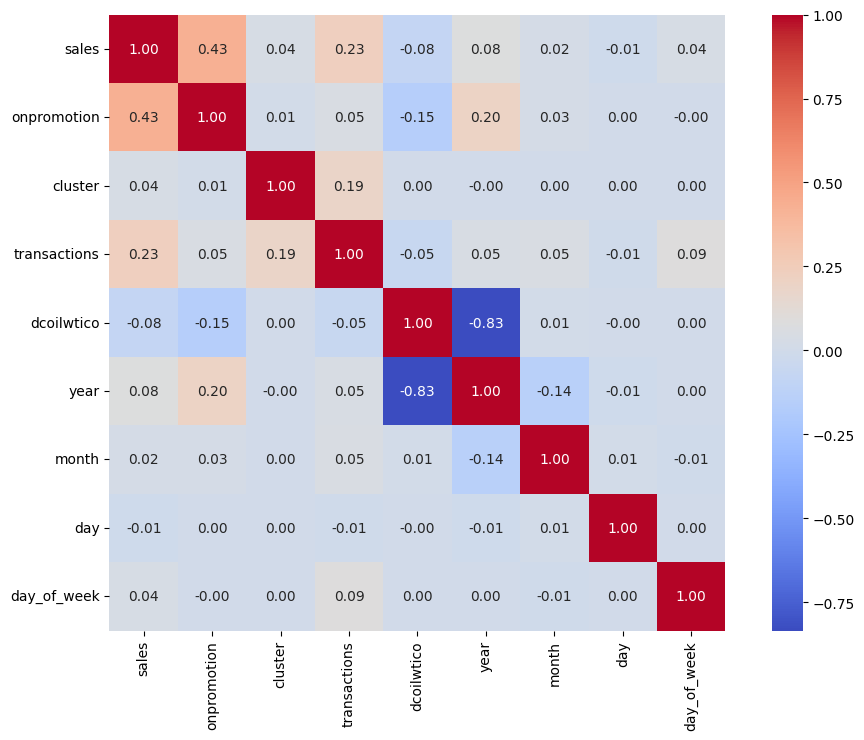

In [12]:
numeric_columns = df.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr()
# Set the plot size
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,  # Show correlation coefficients in each cell
    fmt=".2f",   # Format the correlation values
    cmap="coolwarm",  # Colormap
    cbar=True,  # Show the color bar
    square=True  # Make cells square-shaped
)


Notable correlation is observed between 'year' and 'dcoilwtico'.

This negative correlation of -0.83 suggests a strong inverse relationship between the year and oil prices. It indicates that, over the years from 2013 to 2017, oil prices generally decreased. This trend may have been influenced by various factors such as changes in global supply, demand fluctuations, and geopolitical events.

### Categorical features analysis using ANOVA method

In [ ]:
categorical_columns = data.select_dtypes(exclude='number').columns

anova_results = {}


for col in categorical_columns:
    formula = f'target ~ C({col})'  
    model = ols(formula, data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    # Extract p-value
    p_value = anova_table.loc[f'C({col})', 'PR(>F)']
    anova_results[col] = p_value

# Display the results
for col, p_value in anova_results.items():
    print(f"ANOVA result for {col}: p-value = {p_value:.5f}")
    if p_value < 0.05:
        print(f"   -> Significant difference found for {col}")
    else:
        print(f"   -> No significant difference found for {col}")

### Chi-squared tests for columns

Chi-squared test between family and onpromotion:
Chi-squared statistic: 1545283.6927
p-value: 0.0000
Statistically Significant: True

Chi-squared test between family and city:
Chi-squared statistic: 0.0478
p-value: 1.0000
Statistically Significant: False

Chi-squared test between family and state:
Chi-squared statistic: 0.0385
p-value: 1.0000
Statistically Significant: False

Chi-squared test between family and store_type:
Chi-squared statistic: 0.0135
p-value: 1.0000
Statistically Significant: False

Chi-squared test between family and cluster:
Chi-squared statistic: 0.0602
p-value: 1.0000
Statistically Significant: False

Chi-squared test between family and event_type:
Chi-squared statistic: 0.0051
p-value: 1.0000
Statistically Significant: False

Chi-squared test between family and locale:
Chi-squared statistic: 0.0055
p-value: 1.0000
Statistically Significant: False

Chi-squared test between family and transferred:
Chi-squared statistic: 0.0076
p-value: 1.0000
Statistically Signifi

/tmp/ipykernel_8149/1339240541.py:35: RuntimeWarning: divide by zero encountered in log10
  p_value_matrix[i, j] = -np.log10(result['p_value']) * (result['p_value'] < 0.05)


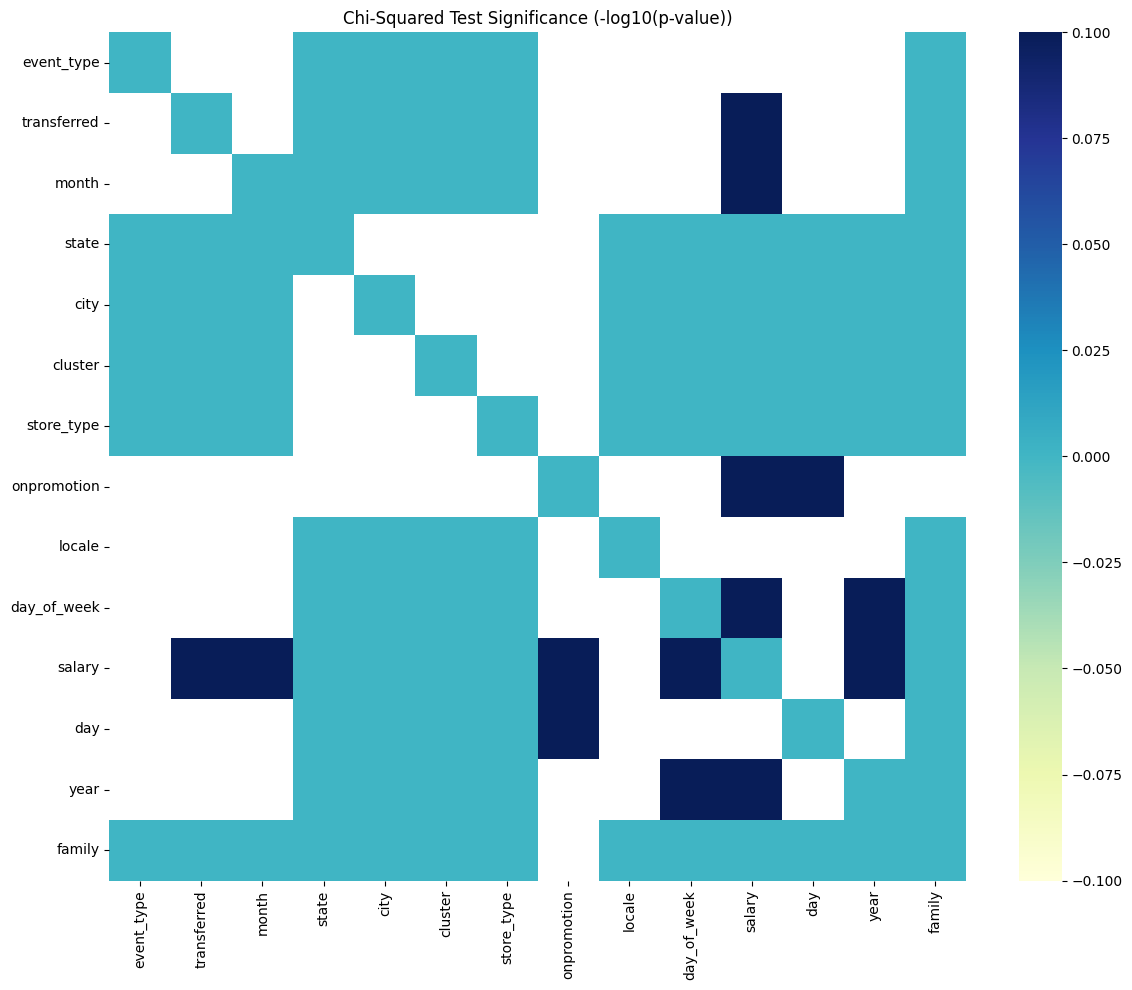

In [14]:
def perform_chi_squared_tests(df):
    # Identify categorical columns
    cat_columns = df.select_dtypes(include=['object', 'category', 'bool', 'int32', 'int64']).columns.tolist()
    cat_columns = [col for col in cat_columns if col != 'sales']
    
    # Initialize results dictionary
    chi_results = {}
    
    # Perform Chi-squared tests
    for col1 in cat_columns:
        for col2 in cat_columns:
            if col1 != col2:
                # Create contingency table
                contingency_table = pd.crosstab(df[col1], df[col2])
                
                # Perform Chi-squared test
                chi2, p_value, dof, expected = chi2_contingency(contingency_table)
                
                chi_results[(col1, col2)] = {
                    'chi2_statistic': chi2,
                    'p_value': p_value,
                    'degrees_of_freedom': dof,
                    'significant': p_value < 0.05
                }
    
    return chi_results

def visualize_chi_squared_results(chi_results):
    # Prepare data for heatmap
    columns = list(set([col for pair in chi_results.keys() for col in pair]))
    p_value_matrix = np.zeros((len(columns), len(columns)))
    
    for (col1, col2), result in chi_results.items():
        i, j = columns.index(col1), columns.index(col2)
        p_value_matrix[i, j] = -np.log10(result['p_value']) * (result['p_value'] < 0.05)
    
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(p_value_matrix, annot=False, cmap='YlGnBu', 
                xticklabels=columns, yticklabels=columns)
    plt.title('Chi-Squared Test Significance (-log10(p-value))')
    plt.tight_layout()
    plt.show()

# Usage example
def main(df):
    # Perform Chi-squared tests
    chi_results = perform_chi_squared_tests(df)
    
    # Print detailed results
    for (col1, col2), result in chi_results.items():
        print(f"Chi-squared test between {col1} and {col2}:")
        print(f"Chi-squared statistic: {result['chi2_statistic']:.4f}")
        print(f"p-value: {result['p_value']:.4f}")
        print(f"Statistically Significant: {result['significant']}\n")
    
    # Visualize results
    visualize_chi_squared_results(chi_results)

# If you want to run directly
if 'df' in locals():
    main(df)

In [23]:
def perform_chi_squared_tests(df, significance_threshold=0.05, chi2_threshold=100):
    # Identify categorical columns
    cat_columns = df.select_dtypes(include=['object', 'category', 'bool', 'int32', 'int64']).columns.tolist()
    cat_columns = [col for col in cat_columns if col != 'sales']
    
    # Use combinations to avoid redundant tests
    column_combinations = list(itertools.combinations(cat_columns, 2))
    
    # Initialize results list
    high_correlation_results = []
    
    # Perform Chi-squared tests
    for col1, col2 in column_combinations:
        # Create contingency table
        contingency_table = pd.crosstab(df[col1], df[col2])
        
        # Perform Chi-squared test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Check if relationship is statistically significant and strong
        if p_value < significance_threshold and chi2 > chi2_threshold:
            high_correlation_results.append({
                'variable1': col1,
                'variable2': col2,
                'chi2_statistic': chi2,
                'p_value': p_value
            })
    
    # Sort results by chi-squared statistic in descending order
    high_correlation_results.sort(key=lambda x: x['chi2_statistic'], reverse=True)
    
    return high_correlation_results

def main(df):
    # Perform Chi-squared tests
    results = perform_chi_squared_tests(df)
    
    # Print results
    print("High Correlation Variables:")
    for result in results:
        print(f"{result['variable1']} - {result['variable2']}:")
        print(f"  Chi-squared statistic: {result['chi2_statistic']:.4f}")
        print(f"  p-value: {result['p_value']:.4f}\n")
    
    return results

# If you want to run directly
if 'df' in locals():
    main(df)

High Correlation Variables:
city - state:
  Chi-squared statistic: 45487755.0000
  p-value: 0.0000

city - cluster:
  Chi-squared statistic: 17942849.8987
  p-value: 0.0000

state - cluster:
  Chi-squared statistic: 14874379.0051
  p-value: 0.0000

store_type - cluster:
  Chi-squared statistic: 10662208.2511
  p-value: 0.0000

city - store_type:
  Chi-squared statistic: 4880567.9120
  p-value: 0.0000

event_type - locale:
  Chi-squared statistic: 4219424.3077
  p-value: 0.0000

state - store_type:
  Chi-squared statistic: 3264523.2657
  p-value: 0.0000

day - salary:
  Chi-squared statistic: 2558714.3699
  p-value: 0.0000

family - onpromotion:
  Chi-squared statistic: 1545283.6927
  p-value: 0.0000

event_type - month:
  Chi-squared statistic: 830517.2925
  p-value: 0.0000

event_type - day:
  Chi-squared statistic: 620382.4357
  p-value: 0.0000

locale - day:
  Chi-squared statistic: 547337.2033
  p-value: 0.0000

onpromotion - year:
  Chi-squared statistic: 522809.2963
  p-value: 0.

## Transforming Categorical Data into Numerical Values

Encoding the 'family' feature

In [50]:
family_mapping = {family: idx for idx, family in enumerate(data['family'].unique())}
data['family'] = data['family'].replace(category_mapping)
data

/tmp/ipykernel_8149/2063726593.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['family'] = data['family'].replace(category_mapping)


,date,family,onpromotion,city,state,store_type,cluster,transactions,event_type,locale,transferred,dcoilwtico
0,2013-01-01,0,0,Quito,Pichincha,D,13,0.0,Holiday,National,False,93.14
1,2013-01-01,1,0,Quito,Pichincha,D,13,0.0,Holiday,National,False,93.14
2,2013-01-01,2,0,Quito,Pichincha,D,13,0.0,Holiday,National,False,93.14
3,2013-01-01,3,0,Quito,Pichincha,D,13,0.0,Holiday,National,False,93.14
4,2013-01-01,4,0,Quito,Pichincha,D,13,0.0,Holiday,National,False,93.14
...,...,...,...,...,...,...,...,...,...,...,...,...
3032512,2017-08-15,28,0,Quito,Pichincha,B,6,2155.0,Holiday,Local,False,47.57
3032513,2017-08-15,29,1,Quito,Pichincha,B,6,2155.0,Holiday,Local,False,47.57
3032514,2017-08-15,30,148,Quito,Pichincha,B,6,2155.0,Holiday,Local,False,47.57
3032515,2017-08-15,31,8,Quito,Pichincha,B,6,2155.0,Holiday,Local,False,47.57


In [51]:
family_mapping

{'AUTOMOTIVE': 0,
 'BABY CARE': 1,
 'BEAUTY': 2,
 'BEVERAGES': 3,
 'BOOKS': 4,
 'BREAD/BAKERY': 5,
 'CELEBRATION': 6,
 'CLEANING': 7,
 'DAIRY': 8,
 'DELI': 9,
 'EGGS': 10,
 'FROZEN FOODS': 11,
 'GROCERY I': 12,
 'GROCERY II': 13,
 'HARDWARE': 14,
 'HOME AND KITCHEN I': 15,
 'HOME AND KITCHEN II': 16,
 'HOME APPLIANCES': 17,
 'HOME CARE': 18,
 'LADIESWEAR': 19,
 'LAWN AND GARDEN': 20,
 'LINGERIE': 21,
 'LIQUOR,WINE,BEER': 22,
 'MAGAZINES': 23,
 'MEATS': 24,
 'PERSONAL CARE': 25,
 'PET SUPPLIES': 26,
 'PLAYERS AND ELECTRONICS': 27,
 'POULTRY': 28,
 'PREPARED FOODS': 29,
 'PRODUCE': 30,
 'SCHOOL AND OFFICE SUPPLIES': 31,
 'SEAFOOD': 32}

To prepare the dataset for machine learning, We replaced the categorical family column with numerical values. Each unique family category was assigned a specific number, such as AUTOMOTIVE to 0, BABY CARE to 1, and so on, up to SEAFOOD as 32. This mapping ensures that the family column is in a numerical format suitable for machine learning models. Additionally, we also saved this mapping for future use, so that any new data with the same family categories can be consistently encoded using the same numbers.

The same transformation was applied to all other categorical features.

Encoding the 'city' feature

In [52]:
city_mapping = {city: idx for idx, city in enumerate(data['city'].unique())}


data['city'] = data['city'].replace(city_mapping)
data

/tmp/ipykernel_8149/695634141.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['city'] = data['city'].replace(city_mapping)


,date,family,onpromotion,city,state,store_type,cluster,transactions,event_type,locale,transferred,dcoilwtico
0,2013-01-01,0,0,0,Pichincha,D,13,0.0,Holiday,National,False,93.14
1,2013-01-01,1,0,0,Pichincha,D,13,0.0,Holiday,National,False,93.14
2,2013-01-01,2,0,0,Pichincha,D,13,0.0,Holiday,National,False,93.14
3,2013-01-01,3,0,0,Pichincha,D,13,0.0,Holiday,National,False,93.14
4,2013-01-01,4,0,0,Pichincha,D,13,0.0,Holiday,National,False,93.14
...,...,...,...,...,...,...,...,...,...,...,...,...
3032512,2017-08-15,28,0,0,Pichincha,B,6,2155.0,Holiday,Local,False,47.57
3032513,2017-08-15,29,1,0,Pichincha,B,6,2155.0,Holiday,Local,False,47.57
3032514,2017-08-15,30,148,0,Pichincha,B,6,2155.0,Holiday,Local,False,47.57
3032515,2017-08-15,31,8,0,Pichincha,B,6,2155.0,Holiday,Local,False,47.57


In [53]:
city_mapping

{'Quito': 0,
 'Cayambe': 1,
 'Latacunga': 2,
 'Riobamba': 3,
 'Ibarra': 4,
 'Santo Domingo': 5,
 'Guaranda': 6,
 'Puyo': 7,
 'Ambato': 8,
 'Guayaquil': 9,
 'Salinas': 10,
 'Daule': 11,
 'Babahoyo': 12,
 'Quevedo': 13,
 'Playas': 14,
 'Libertad': 15,
 'Cuenca': 16,
 'Loja': 17,
 'Machala': 18,
 'Esmeraldas': 19,
 'Manta': 20,
 'El Carmen': 21}

Encoding the 'state' feature

In [54]:
state_mapping = {state: idx for idx, state in enumerate(data['state'].unique())}


data['state'] = data['state'].replace(state_mapping)
data

/tmp/ipykernel_8149/1160309710.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['state'] = data['state'].replace(state_mapping)


,date,family,onpromotion,city,state,store_type,cluster,transactions,event_type,locale,transferred,dcoilwtico
0,2013-01-01,0,0,0,0,D,13,0.0,Holiday,National,False,93.14
1,2013-01-01,1,0,0,0,D,13,0.0,Holiday,National,False,93.14
2,2013-01-01,2,0,0,0,D,13,0.0,Holiday,National,False,93.14
3,2013-01-01,3,0,0,0,D,13,0.0,Holiday,National,False,93.14
4,2013-01-01,4,0,0,0,D,13,0.0,Holiday,National,False,93.14
...,...,...,...,...,...,...,...,...,...,...,...,...
3032512,2017-08-15,28,0,0,0,B,6,2155.0,Holiday,Local,False,47.57
3032513,2017-08-15,29,1,0,0,B,6,2155.0,Holiday,Local,False,47.57
3032514,2017-08-15,30,148,0,0,B,6,2155.0,Holiday,Local,False,47.57
3032515,2017-08-15,31,8,0,0,B,6,2155.0,Holiday,Local,False,47.57


In [55]:
state_mapping

{'Pichincha': 0,
 'Cotopaxi': 1,
 'Chimborazo': 2,
 'Imbabura': 3,
 'Santo Domingo de los Tsachilas': 4,
 'Bolivar': 5,
 'Pastaza': 6,
 'Tungurahua': 7,
 'Guayas': 8,
 'Santa Elena': 9,
 'Los Rios': 10,
 'Azuay': 11,
 'Loja': 12,
 'El Oro': 13,
 'Esmeraldas': 14,
 'Manabi': 15}

Encoding the 'event_type' feature

In [56]:
event_type_mapping = {category: idx for idx, category in enumerate(data['event_type'].unique())}
data['event_type'] = data['event_type'].replace(event_type_mapping)
data

/tmp/ipykernel_8149/4258863724.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['event_type'] = data['event_type'].replace(event_type_mapping)


,date,family,onpromotion,city,state,store_type,cluster,transactions,event_type,locale,transferred,dcoilwtico
0,2013-01-01,0,0,0,0,D,13,0.0,0,National,False,93.14
1,2013-01-01,1,0,0,0,D,13,0.0,0,National,False,93.14
2,2013-01-01,2,0,0,0,D,13,0.0,0,National,False,93.14
3,2013-01-01,3,0,0,0,D,13,0.0,0,National,False,93.14
4,2013-01-01,4,0,0,0,D,13,0.0,0,National,False,93.14
...,...,...,...,...,...,...,...,...,...,...,...,...
3032512,2017-08-15,28,0,0,0,B,6,2155.0,0,Local,False,47.57
3032513,2017-08-15,29,1,0,0,B,6,2155.0,0,Local,False,47.57
3032514,2017-08-15,30,148,0,0,B,6,2155.0,0,Local,False,47.57
3032515,2017-08-15,31,8,0,0,B,6,2155.0,0,Local,False,47.57


event_type_mapping

Encoding the 'locale' feature

In [57]:
locale_mapping = {category: idx for idx, category in enumerate(data['locale'].unique())}
data['locale'] = data['locale'].replace(locale_mapping)
data

/tmp/ipykernel_8149/3228394076.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['locale'] = data['locale'].replace(locale_mapping)


,date,family,onpromotion,city,state,store_type,cluster,transactions,event_type,locale,transferred,dcoilwtico
0,2013-01-01,0,0,0,0,D,13,0.0,0,0,False,93.14
1,2013-01-01,1,0,0,0,D,13,0.0,0,0,False,93.14
2,2013-01-01,2,0,0,0,D,13,0.0,0,0,False,93.14
3,2013-01-01,3,0,0,0,D,13,0.0,0,0,False,93.14
4,2013-01-01,4,0,0,0,D,13,0.0,0,0,False,93.14
...,...,...,...,...,...,...,...,...,...,...,...,...
3032512,2017-08-15,28,0,0,0,B,6,2155.0,0,2,False,47.57
3032513,2017-08-15,29,1,0,0,B,6,2155.0,0,2,False,47.57
3032514,2017-08-15,30,148,0,0,B,6,2155.0,0,2,False,47.57
3032515,2017-08-15,31,8,0,0,B,6,2155.0,0,2,False,47.57


In [58]:
locale_mapping

{'National': 0, 'no event': 1, 'Local': 2, 'Regional': 3}

Encoding the 'store_type' feature

In [59]:
store_type_mapping = {category: idx for idx, category in enumerate(data['store_type'].unique())}
data['store_type'] = data['store_type'].replace(store_type_mapping)

data

/tmp/ipykernel_8149/3051007626.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['store_type'] = data['store_type'].replace(store_type_mapping)


,date,family,onpromotion,city,state,store_type,cluster,transactions,event_type,locale,transferred,dcoilwtico
0,2013-01-01,0,0,0,0,0,13,0.0,0,0,False,93.14
1,2013-01-01,1,0,0,0,0,13,0.0,0,0,False,93.14
2,2013-01-01,2,0,0,0,0,13,0.0,0,0,False,93.14
3,2013-01-01,3,0,0,0,0,13,0.0,0,0,False,93.14
4,2013-01-01,4,0,0,0,0,13,0.0,0,0,False,93.14
...,...,...,...,...,...,...,...,...,...,...,...,...
3032512,2017-08-15,28,0,0,0,2,6,2155.0,0,2,False,47.57
3032513,2017-08-15,29,1,0,0,2,6,2155.0,0,2,False,47.57
3032514,2017-08-15,30,148,0,0,2,6,2155.0,0,2,False,47.57
3032515,2017-08-15,31,8,0,0,2,6,2155.0,0,2,False,47.57


In [60]:
store_type_mapping

{'D': 0, 'C': 1, 'B': 2, 'E': 3, 'A': 4}